正在检测 Unemployment, total (% of total labor force) (modeled ILO estimate) 的平稳性...
数据在 0 次差分后平稳 (p=0.0256)
正在检测 Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate) 的平稳性...
数据在 2 次差分后平稳 (p=0.0001)
正在检测 Ratio of female to male labor force participation rate (%) (modeled ILO estimate) 的平稳性...
数据在 0 次差分后平稳 (p=0.0010)


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib

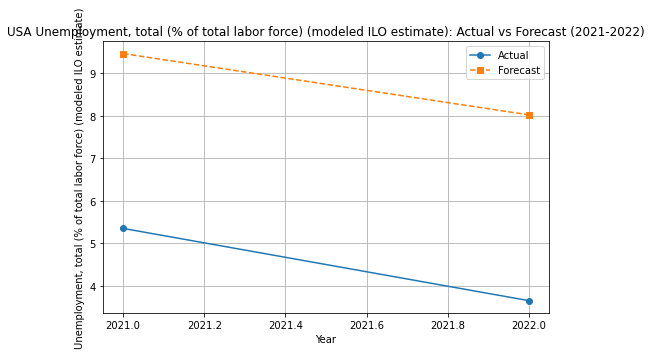

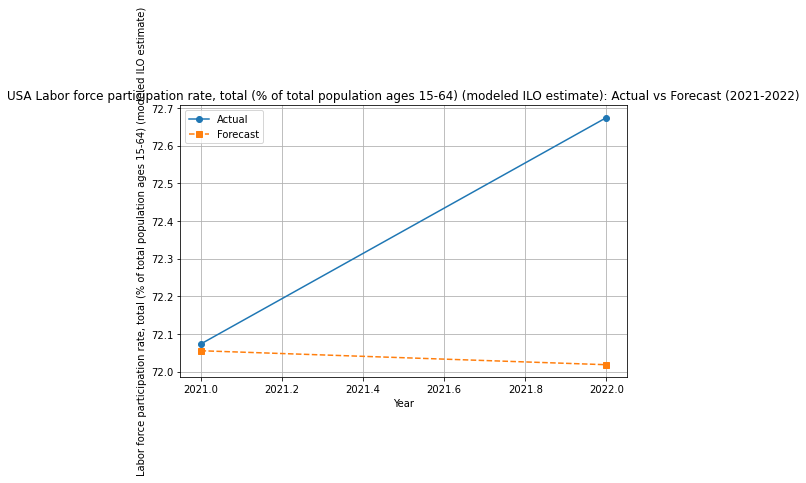

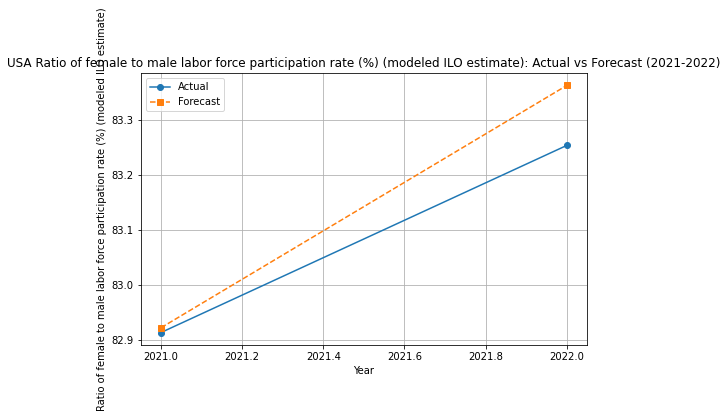

In [28]:
# 修改代码，使其能够自动检测 p 值，并在非平稳的情况下继续进行差分

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# 读取数据集
file_path = "df_pivot.csv"
df = pd.read_csv(file_path)

# 1. 划分数据集，分为美国与加拿大
df_usa = df[df["Country Name"] == "United States"].copy()
df_canada = df[df["Country Name"] == "Canada"].copy()

# 2. 分割1991-2020年数据作为训练集
df_usa_train = df_usa[df_usa["Year"] <= 2020].copy()
df_canada_train = df_canada[df_canada["Year"] <= 2020].copy()

# 3. 分割2021-2022年数据作为测试集
df_usa_test = df_usa[df_usa["Year"] > 2020].copy()
df_canada_test = df_canada[df_canada["Year"] > 2020].copy()

# 选择目标列
columns_to_forecast = [
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)",
    "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)"
]

# ADF检验和差分处理函数
def make_stationary(series, max_diff=5, significance=0.05):
    diff_count = 0
    while diff_count < max_diff:
        adf_result = adfuller(series.dropna())
        p_value = adf_result[1]
        
        # 如果 p 值小于显著性水平，说明数据已经平稳
        if p_value < significance:
            print(f"数据在 {diff_count} 次差分后平稳 (p={p_value:.4f})")
            return series, diff_count
        
        # 进行一次差分
        series = series.diff()
        diff_count += 1

    print(f"数据在 {max_diff} 次差分后仍未平稳，最终 p 值 = {p_value:.4f}")
    return series, diff_count

# 存储最终数据
processed_data = {}
diff_orders = {}

for col in columns_to_forecast:
    print(f"正在检测 {col} 的平稳性...")
    processed_series, diff_count = make_stationary(df_usa_train[col])
    processed_data[col] = processed_series.dropna()
    diff_orders[col] = diff_count

# 定义不同变量的 ARIMA (p, d, q) 参数
arima_orders = {
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": (1, 0, 1),
    "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)": (9, 0, 15),
    "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)": (6, 0, 9)
}

# 预测各变量
forecasts = {}

for col in columns_to_forecast:
    order = arima_orders.get(col, (1, 0, 1))  # 如果未指定，则默认 (1, 0, 1)
    model = ARIMA(processed_data[col], order=order)
    model_fit = model.fit()
    forecasts[col] = model_fit.forecast(steps=2)

# 逆差分（如果进行了差分）
for col in columns_to_forecast:
    if diff_orders[col] > 0:
        last_value = df_usa_train[col].iloc[-1]
        forecasts[col] = last_value + forecasts[col].cumsum()

# 结果存储
df_comparison = {}

for col in columns_to_forecast:
    df_comparison[col] = df_usa_test[["Year", col]].copy()
    df_comparison[col]["Forecast"] = forecasts[col].values

# 绘制预测结果
for col in columns_to_forecast:
    plt.figure(figsize=(8, 5))
    plt.plot(df_comparison[col]["Year"], df_comparison[col][col], marker='o', label="Actual")
    plt.plot(df_comparison[col]["Year"], df_comparison[col]["Forecast"], marker='s', linestyle="--", label="Forecast")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.title(f"USA {col}: Actual vs Forecast (2021-2022)")
    plt.legend()
    plt.grid(True)
    plt.show()


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib

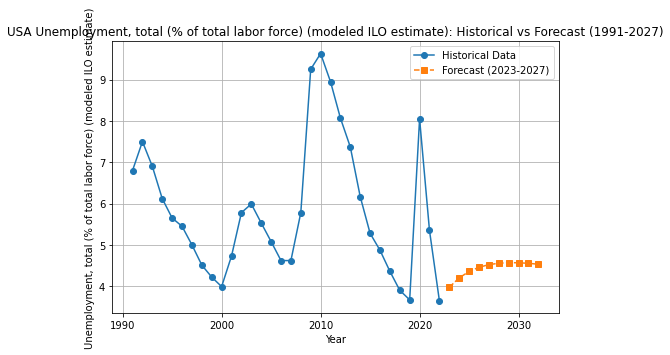

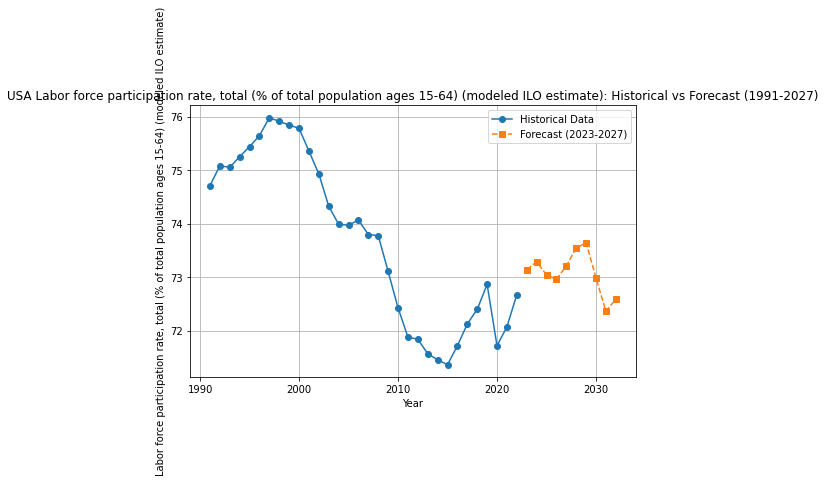

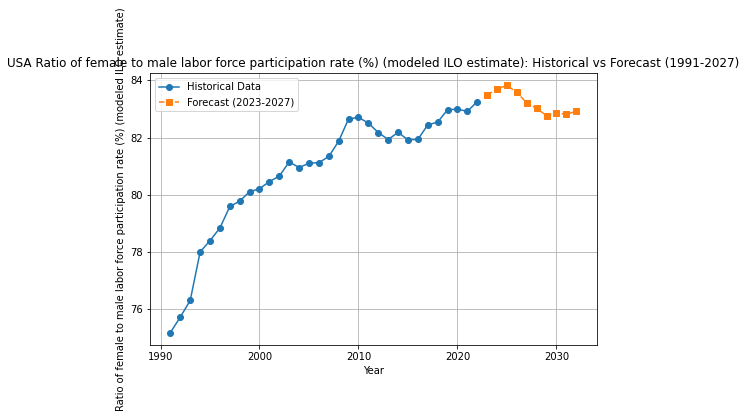

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# 读取数据集
file_path = "df_pivot.csv"
df = pd.read_csv(file_path)

# 1. 划分数据集，分为美国与加拿大
df_usa = df[df["Country Name"] == "United States"].copy()

# 2. 训练数据集（1991-2022年）
df_usa_train = df_usa[df_usa["Year"] <= 2022].copy()

# 选择目标列
columns_to_forecast = [
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)",
    "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)"
]

# ADF检验和差分处理函数
def make_stationary(series, max_diff=5, significance=0.05):
    """
    进行ADF平稳性检测，如果数据非平稳，则进行差分处理，直到数据平稳或达到最大差分次数。

    参数:
    series - 需要检测的时间序列数据
    max_diff - 最大允许的差分次数
    significance - ADF 统计检验的显著性水平

    返回:
    series - 平稳化后的数据
    diff_count - 进行的差分次数
    """
    diff_count = 0
    while diff_count < max_diff:
        adf_result = adfuller(series.dropna())
        p_value = adf_result[1]
        
        # 如果 p 值小于显著性水平，说明数据已经平稳
        if p_value < significance:
            return series, diff_count
        
        # 进行一次差分
        series = series.diff()
        diff_count += 1

    return series, diff_count

# 存储最终数据
processed_data = {}
diff_orders = {}

for col in columns_to_forecast:
    processed_series, diff_count = make_stationary(df_usa_train[col])
    processed_data[col] = processed_series.dropna()
    diff_orders[col] = diff_count

# 定义不同变量的 ARIMA (p, d, q) 参数
arima_orders = {
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": (1, 0, 1),
    "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)": (9, 0, 15),
    "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)": (6, 0, 9)
}

# 预测未来五年（2023-2027）
forecast_years = [2023, 2024, 2025, 2026, 2027,2028,2029,2030,2031,2032]
forecasts = {}

for col in columns_to_forecast:
    order = arima_orders.get(col, (1, 0, 1))  # 默认值
    model = ARIMA(processed_data[col], order=order)
    model_fit = model.fit()
    forecasts[col] = model_fit.forecast(steps=10)

# 逆差分（如果进行了差分）
for col in columns_to_forecast:
    if diff_orders[col] > 0:
        last_value = df_usa_train[col].iloc[-1]
        forecasts[col] = last_value + forecasts[col].cumsum()

# 结果存储（包含原始数据 + 预测数据）
df_forecast = pd.DataFrame({"Year": forecast_years})
for col in columns_to_forecast:
    df_forecast[col] = forecasts[col].values

# 合并原始数据和预测数据
df_combined = pd.concat([df_usa[["Year"] + columns_to_forecast], df_forecast], ignore_index=True)

# 绘制预测结果（包含原始数据 + 预测数据）
for col in columns_to_forecast:
    plt.figure(figsize=(8, 5))
    plt.plot(df_usa["Year"], df_usa[col], marker='o', label="Historical Data")
    plt.plot(df_forecast["Year"], df_forecast[col], marker='s', linestyle="--", label="Forecast (2023-2027)")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.title(f"USA {col}: Historical vs Forecast (1991-2027)")
    plt.legend()
    plt.grid(True)
    plt.show()
